# Machine Learning
- 機器學習可用於創建聊天機器人、檢測垃圾郵件或圖像識別。
- using pandas, numpy, matplotlib and scikit-learn.
- Pandas is used for reading data and data manipulation.
- numpy is used for computations of numerical data. 
- matplotlib is used for graphing data.
- scikit-learn is used for machine learning models.

<p>In Machine Learning, we talk about supervised and unsupervised learning:<br />
Supervised learning is when we have a known target based on past data (for example, predicting what price a house will sell for).<br />
Unsupervised learning is when there isn't a known past answer (for example, determining the topics discussed in restaurant reviews).<br />
在監督學習中，存在分類(classification)和回歸(regression)問題。回歸是預測一個數值（例如，預測房子的售價），而分類是預測某物屬於哪個類別（例如，預測借款人是否會拖欠貸款)。<br />
我們的示例將包括：<br />
• 預測誰能在泰坦尼克號墜毀中倖存下來<br />
• 從圖像中確定手寫數字<br />
• 使用活檢數據對腫塊是否癌變進行分類<br />
<br />
We'll be using a number of popular techniques to tackle these problems. We'll get into each of them in more detail <br />
in upcoming modules:<br />
• Logistic Regression<br />
• Decision Trees<br />
• Random Forests<br />
• Neural Networks<br />
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#numpy
data = [15, 16, 18, 19, 22, 24, 29, 30, 34]

print("mean:", np.mean(data))
print("median:", np.median(data))
print("50th percentile (median):", np.percentile(data, 50))
print("25th percentile:", np.percentile(data, 25))
print("75th percentile:", np.percentile(data, 75))
print("standard deviation:", np.std(data))
print("variance:", np.var(data))

mean: 23.0
median: 22.0
50th percentile (median): 22.0
25th percentile: 18.0
75th percentile: 29.0
standard deviation: 6.342099196813483
variance: 40.22222222222222


In [3]:
# Pandas
df=pd.read_csv('titanic.csv')

#The head method returns the first 5 rows of the DataFrame.
print(df.head())

   Survived   Pclass      Sex   Age   Siblings/Spouses   Parents/Children  \
0         0        3     male  22.0                  1                  0   
1         1        1   female  38.0                  1                  0   
2         1        3   female  26.0                  0                  0   
3         1        1   female  35.0                  1                  0   

      Fare  
0   7.2500  
1  71.2833  
2   7.9250  
3  53.1000  


In [4]:
# We add a line in the code below to force python to display all 6 columns. 
# Without the line, it will abbreviate the results.
pd.options.display.max_columns = 6 
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
# use the describe method. It returns a table of statistics about the columns.
print(df.describe())

         Survived      Pclass         Age  Siblings/Spouses  Parents/Children  \
count  887.000000  887.000000  887.000000        887.000000        887.000000   
mean     0.385569    2.305524   29.471443          0.525366          0.383315   
std      0.487004    0.836662   14.121908          1.104669          0.807466   
min      0.000000    1.000000    0.420000          0.000000          0.000000   
25%      0.000000    2.000000   20.250000          0.000000          0.000000   
50%      0.000000    3.000000   28.000000          0.000000          0.000000   
75%      1.000000    3.000000   38.000000          1.000000          0.000000   
max      1.000000    3.000000   80.000000          8.000000          6.000000   

            Fare  
count  887.00000  
mean    32.30542  
std     49.78204  
min      0.00000  
25%      7.92500  
50%     14.45420  
75%     31.13750  
max    512.32920  


In [5]:
#Selecting a Single Column
col = df['Fare']
print(col)
#The result is what we call a Pandas Series.
# A series is like a DataFrame, but it's just a single column.

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
882    13.0000
883    30.0000
884    23.4500
885    30.0000
886     7.7500
Name: Fare, Length: 887, dtype: float64


In [6]:
#Selecting Multiple Columns
small_df = df[['Age', 'Sex', 'Survived']]
print(small_df.head()) #you can use the head method to print just the first 5 rows.

    Age     Sex  Survived
0  22.0    male         0
1  38.0  female         1
2  26.0  female         1
3  35.0  female         1
4  35.0    male         0


In [7]:
#Creating a Column
#We create a Pandas Series that will be a series of Trues and Falses 
#   (True if the passenger is male and False if the passenger is female).
#Now we want to create a column with this result. 
#   To create a new column, we use the same bracket syntax (df['male']) and then assign this new value to it.
df['male'] = (df['Sex'] == 'male')
print(df.head()) #Note the new column at the end.

   Survived  Pclass     Sex  ...  Parents/Children     Fare   male
0         0       3    male  ...                 0   7.2500   True
1         1       1  female  ...                 0  71.2833  False
2         1       3  female  ...                 0   7.9250  False
3         1       1  female  ...                 0  53.1000  False
4         0       3    male  ...                 0   8.0500   True

[5 rows x 8 columns]


In [8]:
#Converting from a Pandas Series to a Numpy Array
#Let's convert the Fare column to a numpy array.
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')

df['Fare'].values

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
        41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,  21.6792,
        17.8   ,  39.6875,   7.8   ,  76.7292,  26.    ,  61.9792,
        35.5   ,  10.5   ,   7.2292,  27.75  ,  46.9   ,   7.2292,
        80.    ,  83.475 ,  27.9   ,  27.7208,  15.2458,  10.5   ,
         8.1583,   7.925 ,   8.6625,  10.5   ,  46.9   ,  73.5   ,
        14.4542,  56.4958,   7.65  ,   7.8958,   8.05  ,  29.    ,
        12.475 ,   9.    ,   9.5   ,   7.7875,  47.1   ,  10.5   ,
        15.85  ,  34.375 ,   8.05  , 263.    ,   8.05  ,   8.0

In [9]:
#Converting from a Pandas DataFrame to a Numpy Array
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
print(df[['Pclass', 'Fare', 'Age']].values)

[[ 3.      7.25   22.    ]
 [ 1.     71.2833 38.    ]
 [ 3.      7.925  26.    ]
 ...
 [ 3.     23.45    7.    ]
 [ 1.     30.     26.    ]
 [ 3.      7.75   32.    ]]


In [10]:
#Numpy Shape Attribute
# We use the numpy shape attribute to determine the size of our numpy array.
arr = df[['Pclass', 'Fare', 'Age']].values
print(arr.shape) #(887, 3)  This result means we have 887 rows and 3 columns.

#select a single element from a numpy array with the following:
print(arr[0,1]) #This will be the 2nd column of the 1st row (remember that we start counting at 0).


(887, 3)
7.25


In [11]:
#Masking
#We create what we call a mask first. 
#   This is an array of boolean values (True/False) of whether the passenger is a child or not.
mask = arr[:, 2] < 18
print(mask)
#The False values mean adult and the True values mean child, 
#   so the first 7 passengers are adults, then 8th is a child, and the 9th is an adult.
arr[mask]

[False False False False False False False  True False  True  True False
 False False  True False  True False False False False False  True False
  True False False False False False False False False False False False
 False False False  True False False  True False False False False  True
 False  True False False False False False False False  True  True False
 False False  True False  True False False  True False False  True False
 False False False False False  True False False False False False  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False  True False False False False  True False
 False False False False  True False False  True False False False False
 False False False False False  True False False False False False False
 False False  True False False False False False False False False  True
 False False  True False False False  True  True  T

array([[  3.    ,  21.075 ,   2.    ],
       [  2.    ,  30.0708,  14.    ],
       [  3.    ,  16.7   ,   4.    ],
       [  3.    ,   7.8542,  14.    ],
       [  3.    ,  29.125 ,   2.    ],
       [  3.    ,   8.0292,  15.    ],
       [  3.    ,  21.075 ,   8.    ],
       [  3.    ,  11.2417,  14.    ],
       [  2.    ,  41.5792,   3.    ],
       [  3.    ,  21.6792,  16.    ],
       [  3.    ,  39.6875,   7.    ],
       [  2.    ,  27.75  ,   5.    ],
       [  3.    ,  46.9   ,  11.    ],
       [  3.    ,  27.9   ,   4.    ],
       [  3.    ,  15.2458,   7.    ],
       [  3.    ,   7.925 ,  17.    ],
       [  3.    ,  46.9   ,  16.    ],
       [  2.    ,  29.    ,   0.83  ],
       [  2.    ,  10.5   ,  17.    ],
       [  3.    ,  34.375 ,  16.    ],
       [  3.    ,  14.4542,  14.5   ],
       [  3.    ,  14.4583,  17.    ],
       [  3.    ,  31.275 ,   2.    ],
       [  3.    ,  11.2417,  12.    ],
       [  3.    ,  22.3583,   2.    ],
       [  3.    ,   9.216

In [12]:
#Generally, we don't need to define the mask variable and can do the above in just a single line:
arr[arr[:, 2] < 18] 

array([[  3.    ,  21.075 ,   2.    ],
       [  2.    ,  30.0708,  14.    ],
       [  3.    ,  16.7   ,   4.    ],
       [  3.    ,   7.8542,  14.    ],
       [  3.    ,  29.125 ,   2.    ],
       [  3.    ,   8.0292,  15.    ],
       [  3.    ,  21.075 ,   8.    ],
       [  3.    ,  11.2417,  14.    ],
       [  2.    ,  41.5792,   3.    ],
       [  3.    ,  21.6792,  16.    ],
       [  3.    ,  39.6875,   7.    ],
       [  2.    ,  27.75  ,   5.    ],
       [  3.    ,  46.9   ,  11.    ],
       [  3.    ,  27.9   ,   4.    ],
       [  3.    ,  15.2458,   7.    ],
       [  3.    ,   7.925 ,  17.    ],
       [  3.    ,  46.9   ,  16.    ],
       [  2.    ,  29.    ,   0.83  ],
       [  2.    ,  10.5   ,  17.    ],
       [  3.    ,  34.375 ,  16.    ],
       [  3.    ,  14.4542,  14.5   ],
       [  3.    ,  14.4583,  17.    ],
       [  3.    ,  31.275 ,   2.    ],
       [  3.    ,  11.2417,  12.    ],
       [  3.    ,  22.3583,   2.    ],
       [  3.    ,   9.216

In [13]:
#Summing and Counting
arr = df[['Pclass', 'Fare', 'Age']].values
mask = arr[:, 2] < 18
print(mask.sum()) 
print((arr[:, 2] < 18).sum())

130
130


Text(0, 0.5, 'Fare')

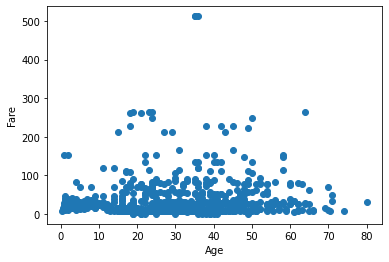

In [14]:
#Scatter Plot
#We use the scatter function to plot our data. 
#   The first argument of the scatter function is the x-axis (horizontal direction) and 
#   the second argument is the y-axis (vertical direction).
# This plots the Age on the x-axis and the Fare on the y-axis.
plt.scatter(df['Age'], df['Fare'])
# This plots the Age on the x-axis and the Fare on the y-axis.
plt.xlabel('Age')
plt.ylabel('Fare')


0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: Pclass, dtype: int64


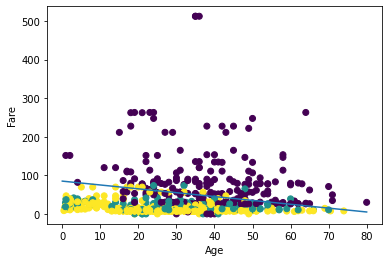

In [15]:

# We can also use our data to color code our scatter plot. This will give each of the 3 classes a different color. 
print(df['Pclass'].head(10))
plt.figure(facecolor='white') #outer background color=white
plt.scatter(df['Age'], df['Fare'], c=df['Pclass'])

# In this case, our Pandas series has 
#   3 possible values (1st, 2nd, and 3rd class), so we'll see our datapoints each get one of three colors.
# The purple dots are first class, the green dots are second class, and the yellow dots are third class.
# A scatter plot is used to show all the values from your data on a graph. 
#   In order to get a visual representation of our data, we have to limit our data to two features.
plt.xlabel('Age')
plt.ylabel('Fare')

# Line
# The following draws a line to approximately separate the 1st class from the 2nd and 3rd class. 
#   From eyeballing, we’ll put the line from (0, 85) to (80, 5). 
#   Our syntax below has a list of the x values and a list of the y values.
plt.plot([0, 80], [85, 5]) #the plot function for a line.
# You can see that the yellow (3rd class) and green (2nd class) points are mostly 
#   below the line and the purple (1st class) are mostly above. 

# Classification

### Where does Classification Fit in the World of Machine Learning?
<p>Machine Learning on a high level is made up of supervised and unsupervised learning.<br /><br />
Supervised Learning means that we will have labeled historical data that we will use to inform our model. We call the label or thing we’re trying to predict, the <strong>target</strong>. So in supervised learning, there is a known target for the historical data, and for unsupervised learning there is no known target.
<br /><br />
Within supervised learning, there is <strong>Classification</strong> and <strong>Regression</strong>. Classification problems are where the target is a categorical value (often True or False, but can be multiple categories). Regression problems are where the target is a numerical value.
<br /><br />
For example, predicting housing prices is a regression problem. It’s supervised, since we have historical data of the sales of houses in the past. It’s <strong>regression</strong>, because the housing price is a numerical value. Predicting if someone will default on their loan is a classification problem. Again, it’s supervised, since we have the historical data of whether past loanees defaulted, and it’s a <strong>classification</strong> problem because we are trying to predict if the loan is in one of two categories (default or not).
<br /><br />
邏輯回歸，雖然它的名字中有回歸，但它是一種解決分類問題的算法，而不是回歸問題。

### Classification Terminology
<p>
The <strong>Survived</strong> column is what we’re trying to predict. We call this the <strong>target</strong>. You can see that it’s a list of 1’s and 0’s. A 1 means that the passenger survived, and a 0 means the passenger didn’t survive.
<br /><br />
The remaining columns are the information about the passenger that we can use to predict the target. We call each of these columns a feature. <strong>Features</strong> are the data we use to make our prediction. Sometimes you’ll hear features called predictors.</strong>
<br /><br />
While we know whether each passenger in the dataset survived, we’d like to be able to make predictions about additional passengers that we weren’t able to collect that data for. We’ll build a machine learning <strong>model</strong> to help us do this.
</p>

### Classification Graphically
We will eventually want to use all the features, but for simplicity let’s start with only two of the features (Fare and Age). Using two features enables us to visualize the data in a graph.
<br /><br />
On the x-axis we have the passenger’s fare and on the y-axis their age. The yellow dots are passengers that survived and the purple dots are passengers that didn’t survive.
<br /><br />
You can see that there are more yellow dots at the bottom of the graph than the top. This is because children were more likely to survive than adults, which fits our intuition. Similarly there are more yellow dots on the right of the graph, meaning people that paid more were more likely to survive.
<br /><br />
The task of a linear model is to find the line that best separates the two classes, so that the yellow points are on one side and the purple points are on the other.
<br /><br />
Here is an example of a good line. The line is used to make predictions about new passengers. If a passenger’s datapoint lies on the right side of the line, we’d predict that they survive. If on the left side, we’d predict that they didn’t survive.
<br /><br />
The challenge of building the model will be determining what the best possible line is.

### Equation for the Line
A line is defined by an equation in the following form:
<br /><br />
0 = ax + by + c
<br /><br />
The values a, b, and c are the coefficients. Any three values will define a unique line.
<br /><br />
Let’s look at a specific example of a line where the coefficients are a=1, b=-1 and c=-30.
<br /><br />
0 = (1)x + (-1)y + (-30)
<br /><br />
The coefficients of the line are what control where the line is.

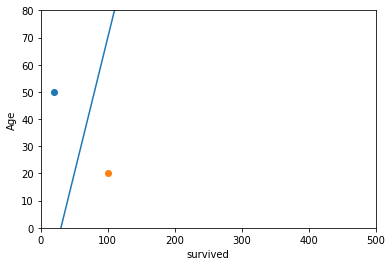

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns
titanic=sns.load_dataset('titanic') #titanic: 泰坦尼克號
titanic
plt.scatter(20,50) #blue dot
plt.scatter(100,20) #orange dot
plt.xlabel("survived") 
plt.ylabel("Age") 
plt.plot([30,110],[0,80]) 
plt.xlim((0,500)) #x軸顯示的範圍
plt.ylim((0,80)) #y軸顯示的範圍
plt.show()

Logistic Regression is a way of mathematically finding the best line.

### Probability of Surviving

為了確定拆分數據的最佳線，我們需要有一種對線進行評分的方法。首先，讓我們看一下單個數據點。

理想情況下，如果數據點是一名倖存的乘客，那麼它應該位於線路的右側並且遠離線路。如果它是一個沒有倖存的乘客的數據點，它會遠離左邊的線。它離直線越遠，我們就越有信心它位於直線的正確一側。
對於每個數據點，我們都會有一個介於 0 和 1 之間的值的分數。我們可以將其視為乘客倖存的概率。如果該值接近 0，則該點將遠離線的左側，這意味著我們確信乘客沒有倖存。如果該值接近 1，則該點將遠離直線的右側，這意味著我們確信乘客確實倖免於難。值為 0.5 表示該點直接落在線上，我們不確定乘客是否倖存。

計算這個分數的方程式如下，儘管直覺比實際方程式重要得多。

回想一下，直線方程的形式為 0 = ax+by+c（x 是票價，y 是年齡，a、b 和 c 是我們控制的係數）。數字 e 是數學常數，大約為 2.71828。

### Likelihood
Here p is the predicted probability of surviving from the previous part.
p:if passenger survived, 1-p: if passenger didn't survived 
The likelihood will be a value between 0 and 1. The higher the value, the better our line is.

Let’s look at a couple possibilities:
• If the predicted probability p is 0.25 and the passenger didn’t survive, we get a score of 0.75 (good).
• If the predicted probability p is 0.25 and the passenger survived, we get a score of 0.25 (bad).

We multiply all the individual scores for each datapoint together to get a score for our line. Thus we can compare different lines to determine the best one.

<img src="class_pictures\likelihood.png" />

We get the total score by multiplying the four scores together:

0.25 * 0.75 * 0.6 * 0.8 = 0.09

The value is always going to be really small since it is the likelihood that our model predicts everything perfectly. A perfect model would have a predicted probability of 1 for all positive cases and 0 for all negative cases.

The likelihood is how we score and compare possible choices of a best fit line.